## Load Data

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

pumpData = pd.read_csv('../data/US-pumpkins.csv')

## View Data

In [20]:
pumpData.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


## Check for missing data

In [21]:
pumpData.isnull().sum()

City Name             0
Type               1712
Package               0
Variety               5
Sub Variety        1461
Grade              1757
Date                  0
Low Price             0
High Price            0
Mostly Low          103
Mostly High         103
Origin                3
Origin District    1626
Item Size           279
Color               616
Environment        1757
Unit of Sale       1595
Quality            1757
Condition          1757
Appearance         1757
Storage            1757
Crop               1757
Repack                0
Trans Mode         1757
Unnamed: 24        1757
Unnamed: 25        1654
dtype: int64

## Drop undesired columns

In [22]:
new_columns = ['Package', 'Month', 'Low Price', 'High Price', 'Date']
pumpData = pumpData.drop([c for c in pumpData.columns if c not in new_columns], axis=1)

In [23]:
pumpData.describe()

,Low Price,High Price
count,1757.000000,1757.000000
mean,124.571338,132.970939
std,83.876591,89.524958
min,0.240000,0.240000
25%,24.000000,24.500000
50%,140.000000,150.000000
75%,180.000000,200.000000
max,480.000000,480.000000


## Populate new price column and adjust date

In [24]:
pumpData.loc[:,'Price'] = (pumpData.loc[:,'Low Price'] + pumpData.loc[:,'High Price']) / 2
pumpData.loc[:,'Month'] = pumpData.loc[:, 'Date'].map(lambda d: int(d.split('/')[0]))
pumpData = pumpData.drop('Date', axis='columns')
pumpData.head()


,Package,Low Price,High Price,Price,Month
0,24 inch bins,270.0,280.0,275.0,4
1,24 inch bins,270.0,280.0,275.0,5
2,24 inch bins,160.0,160.0,160.0,9
3,24 inch bins,160.0,160.0,160.0,9
4,24 inch bins,90.0,100.0,95.0,11


## Only take samples that are bushels

In [25]:
pumpData = pumpData.loc[(pumpData.Package.str.contains('bushel', case=True, regex=True))]
pumpData.head()

,Package,Low Price,High Price,Price,Month
70,1 1/9 bushel cartons,15.0,15.0,15.0,9
71,1 1/9 bushel cartons,18.0,18.0,18.0,9
72,1 1/9 bushel cartons,18.0,18.0,18.0,10
73,1 1/9 bushel cartons,17.0,17.0,17.0,10
74,1 1/9 bushel cartons,15.0,15.0,15.0,10


## Normalize Average Price to be Price per bushel

In [26]:
def normPrice(row):
    if '1 1/9' in row.Package:
        row.Price = row.Price / (1 + 1/9)
    elif '1/2' in row.Package:
        row.Price = row.Price / (1/2)

    return row

pumpData = pumpData.apply(lambda row: normPrice(row), axis='columns')
pumpData.head()

,Package,Low Price,High Price,Price,Month
70,1 1/9 bushel cartons,15.0,15.0,13.5,9
71,1 1/9 bushel cartons,18.0,18.0,16.2,9
72,1 1/9 bushel cartons,18.0,18.0,16.2,10
73,1 1/9 bushel cartons,17.0,17.0,15.3,10
74,1 1/9 bushel cartons,15.0,15.0,13.5,10


## Make a scatter plot of price vs. month

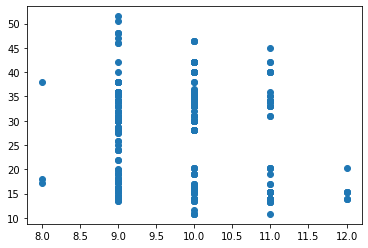

In [27]:
X = pumpData.Month
Y = pumpData.Price

plt.scatter(X, Y)
plt.show()

## Make a Bar Graph showing Average Price for each month

Text(0, 0.5, 'Average Pumpkin Price')

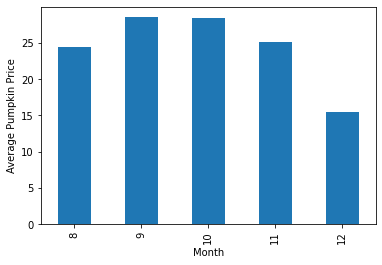

In [28]:
pumpData.groupby('Month').Price.mean().plot(kind='bar')
plt.ylabel("Average Pumpkin Price")